In [348]:
import networkx as nx
import pandas as pd
import ndlib.models.ModelConfig as mc
import ndlib.models.epidemics.IndependentCascadesModel as ids
import matplotlib
%matplotlib inline
import random

## Building and vizualising the network

In [16]:
# Building a directed graph
G = nx.read_weighted_edgelist('higgs-retweet_network.edgelist', create_using=nx.DiGraph (), nodetype=int)

In [23]:
# Building an undirected graph
G_2 = nx.read_weighted_edgelist('higgs-retweet_network.edgelist', nodetype=int)

In [9]:
# Writing a file readeable by GePhi from our network
nx.write_gexf(G, '/Users/surena/Desktop/SAND/higgstwittergraph.gexf')

## Basic metrics

In [17]:
# Total number of nodes
nx.number_of_nodes(G)

256491

In [18]:
# Total number of edges
nx.number_of_edges(G)

328132

In [19]:
# Graph density
nx.density(G)

4.987765389171601e-06

In [28]:
# Number of strongly connected components
nx.number_strongly_connected_components(G)

255002

In [29]:
# Number of weakly connected components
nx.number_weakly_connected_components(G)

13199

In [42]:
# Gives the overall-degree
nx.info(G_2)

'Name: \nType: Graph\nNumber of nodes: 256491\nNumber of edges: 327374\nAverage degree:   2.5527'

In [41]:
# Gives the in-degree and out-degree
nx.info(G)

'Name: \nType: DiGraph\nNumber of nodes: 256491\nNumber of edges: 328132\nAverage in degree:   1.2793\nAverage out degree:   1.2793'

In [136]:
# Gives the betweenness centrality
betw = nx.betweenness_centrality(G)

KeyboardInterrupt: 

## Top ranking nodes for each metric

In [48]:
G_pd = nx.to_pandas_edgelist(G)

In [67]:
overall_degree = nx.degree_centrality(G_2)
in_degree = nx.in_degree_centrality(G)
out_degree = nx.out_degree_centrality(G)
pagerank = nx.pagerank(G)

In [72]:
G_pd['overalldegree'] = G_pd['source'].map(overall_degree)
G_pd['indegree'] = G_pd['source'].map(in_degree)
G_pd['outdegree'] = G_pd['source'].map(out_degree)
G_pd['pagerank'] = G_pd['source'].map(pagerank)

### Overall-degree

In [250]:
G_pd_overalldegree = G_pd.sort_values(by=['overalldegree'], ascending = False)

In [307]:
#This is the top 100 nodes by overall degree
G_pd_overalldegree = G_pd_overalldegree.drop_duplicates('source').head(100)

### In-degree

In [252]:
G_pd_indegree = G_pd.sort_values(by=['indegree'], ascending = False)

In [306]:
#This is the top 100 nodes by indegree
G_pd_indegree = G_pd_indegree.drop_duplicates('source').head(100)

### Out-degree

In [254]:
G_pd_outdegree = G_pd.sort_values(by=['outdegree'], ascending = False)

In [308]:
#This is the top 100 nodes by outdegree
G_pd_outdegree = G_pd_outdegree.drop_duplicates('source').head(100)

### PageRank

In [256]:
G_pd_pagerank = G_pd.sort_values(by=['pagerank'], ascending = False)

In [309]:
#This is the top 100 nodes by pagerank
G_pd_pagerank = G_pd_pagerank.drop_duplicates('source').head(100)

## ICM - Diffusion

In [293]:
# Number of nodes that we will use for our initial sets
samples = [10,20,50,70,100]

### Overall-degree

In [294]:
res = []
for k in range(len(samples)):
    # Model selection
    model = ids.IndependentCascadesModel(G)
    # Model Configuration
    config = mc.Configuration()
    # Model Configuration
    config.add_model_initial_configuration("Infected", list(G_pd_overalldegree['source'])[:samples[k]])
    # Setting the edge parameters
    threshold = 0.5
    for e in G.edges():
        config.add_edge_configuration("threshold", e, threshold)
    model.set_initial_status(config)
    # Simulation execution
    iterations = model.iteration_bunch(200)
    res.append((samples[k],iterations[199]))

In [295]:
res

[(10,
  {'iteration': 199,
   'status': {},
   'node_count': {0: 255760, 1: 0, 2: 731},
   'status_delta': {0: 0, 1: 0, 2: 0}}),
 (20,
  {'iteration': 199,
   'status': {},
   'node_count': {0: 255727, 1: 0, 2: 764},
   'status_delta': {0: 0, 1: 0, 2: 0}}),
 (50,
  {'iteration': 199,
   'status': {},
   'node_count': {0: 255768, 1: 0, 2: 723},
   'status_delta': {0: 0, 1: 0, 2: 0}}),
 (70,
  {'iteration': 199,
   'status': {},
   'node_count': {0: 255685, 1: 0, 2: 806},
   'status_delta': {0: 0, 1: 0, 2: 0}}),
 (100,
  {'iteration': 199,
   'status': {},
   'node_count': {0: 255690, 1: 0, 2: 801},
   'status_delta': {0: 0, 1: 0, 2: 0}})]

In [296]:
res_plot_overall = [0,731,764,723,806,801]

### In-degree

In [312]:
res = []
for k in range(len(samples)):
    # Model selection
    model = ids.IndependentCascadesModel(G)
    # Model Configuration
    config = mc.Configuration()
    # Model Configuration
    config.add_model_initial_configuration("Infected", list(G_pd_indegree['source'])[:samples[k]])
    # Setting the edge parameters
    threshold = 0.5
    for e in G.edges():
        config.add_edge_configuration("threshold", e, threshold)
    model.set_initial_status(config)
    # Simulation execution
    iterations = model.iteration_bunch(200)
    res.append((samples[k],iterations[199]))

In [313]:
res

[(10,
  {'iteration': 199,
   'status': {},
   'node_count': {0: 255838, 1: 0, 2: 653},
   'status_delta': {0: 0, 1: 0, 2: 0}}),
 (20,
  {'iteration': 199,
   'status': {},
   'node_count': {0: 255730, 1: 0, 2: 761},
   'status_delta': {0: 0, 1: 0, 2: 0}}),
 (50,
  {'iteration': 199,
   'status': {},
   'node_count': {0: 255726, 1: 0, 2: 765},
   'status_delta': {0: 0, 1: 0, 2: 0}}),
 (70,
  {'iteration': 199,
   'status': {},
   'node_count': {0: 255653, 1: 0, 2: 838},
   'status_delta': {0: 0, 1: 0, 2: 0}}),
 (100,
  {'iteration': 199,
   'status': {},
   'node_count': {0: 255660, 1: 0, 2: 831},
   'status_delta': {0: 0, 1: 0, 2: 0}})]

In [314]:
res_plot_indegree = [0,653,761,765,838,831]

### Out-degree

In [315]:
res = []
for k in range(len(samples)):
    # Model selection
    model = ids.IndependentCascadesModel(G)
    # Model Configuration
    config = mc.Configuration()
    # Model Configuration
    config.add_model_initial_configuration("Infected", list(G_pd_outdegree['source'])[:samples[k]])
    # Setting the edge parameters
    threshold = 0.5
    for e in G.edges():
        config.add_edge_configuration("threshold", e, threshold)
    model.set_initial_status(config)
    # Simulation execution
    iterations = model.iteration_bunch(200)
    res.append((samples[k],iterations[199]))

In [316]:
res

[(10,
  {'iteration': 199,
   'status': {},
   'node_count': {0: 255540, 1: 0, 2: 951},
   'status_delta': {0: 0, 1: 0, 2: 0}}),
 (20,
  {'iteration': 199,
   'status': {},
   'node_count': {0: 255412, 1: 0, 2: 1079},
   'status_delta': {0: 0, 1: 0, 2: 0}}),
 (50,
  {'iteration': 199,
   'status': {},
   'node_count': {0: 255211, 1: 0, 2: 1280},
   'status_delta': {0: 0, 1: 0, 2: 0}}),
 (70,
  {'iteration': 199,
   'status': {},
   'node_count': {0: 254980, 1: 0, 2: 1511},
   'status_delta': {0: 0, 1: 0, 2: 0}}),
 (100,
  {'iteration': 199,
   'status': {},
   'node_count': {0: 254790, 1: 0, 2: 1701},
   'status_delta': {0: 0, 1: 0, 2: 0}})]

In [317]:
res_plot_outdegree = [0,951,1079,1280,1511,1701]

### PageRank

In [322]:
res = []
for k in range(len(samples)):
    # Model selection
    model = ids.IndependentCascadesModel(G)
    # Model Configuration
    config = mc.Configuration()
    # Model Configuration
    config.add_model_initial_configuration("Infected", list(G_pd_pagerank['source'])[:samples[k]])
    # Setting the edge parameters
    threshold = 0.5
    for e in G.edges():
        config.add_edge_configuration("threshold", e, threshold)
    model.set_initial_status(config)
    # Simulation execution
    iterations = model.iteration_bunch(200)
    res.append((samples[k],iterations[199]))

In [323]:
res

[(10,
  {'iteration': 199,
   'status': {},
   'node_count': {0: 255777, 1: 0, 2: 714},
   'status_delta': {0: 0, 1: 0, 2: 0}}),
 (20,
  {'iteration': 199,
   'status': {},
   'node_count': {0: 255757, 1: 0, 2: 734},
   'status_delta': {0: 0, 1: 0, 2: 0}}),
 (50,
  {'iteration': 199,
   'status': {},
   'node_count': {0: 255802, 1: 0, 2: 689},
   'status_delta': {0: 0, 1: 0, 2: 0}}),
 (70,
  {'iteration': 199,
   'status': {},
   'node_count': {0: 255763, 1: 0, 2: 728},
   'status_delta': {0: 0, 1: 0, 2: 0}}),
 (100,
  {'iteration': 199,
   'status': {},
   'node_count': {0: 255655, 1: 0, 2: 836},
   'status_delta': {0: 0, 1: 0, 2: 0}})]

In [324]:
res_plot_pagerank = [0,714,734,689,728,836]

### Random

In [349]:
list_of_random_items = random.sample(list(G_pd['source']), 100)

In [368]:
res = []
for k in range(len(samples)):
    # Model selection
    model = ids.IndependentCascadesModel(G)
    # Model Configuration
    config = mc.Configuration()
    # Model Configuration
    config.add_model_initial_configuration("Infected", list_of_random_items[:samples[k]])
    # Setting the edge parameters
    threshold = 0.5
    for e in G.edges():
        config.add_edge_configuration("threshold", e, threshold)
    model.set_initial_status(config)
    # Simulation execution
    iterations = model.iteration_bunch(200)
    res.append((samples[k],iterations[199]))

In [369]:
res

[(10,
  {'iteration': 199,
   'status': {},
   'node_count': {0: 255761, 1: 0, 2: 730},
   'status_delta': {0: 0, 1: 0, 2: 0}}),
 (20,
  {'iteration': 199,
   'status': {},
   'node_count': {0: 255737, 1: 0, 2: 754},
   'status_delta': {0: 0, 1: 0, 2: 0}}),
 (50,
  {'iteration': 199,
   'status': {},
   'node_count': {0: 255586, 1: 0, 2: 905},
   'status_delta': {0: 0, 1: 0, 2: 0}}),
 (70,
  {'iteration': 199,
   'status': {},
   'node_count': {0: 255510, 1: 0, 2: 981},
   'status_delta': {0: 0, 1: 0, 2: 0}}),
 (100,
  {'iteration': 199,
   'status': {},
   'node_count': {0: 255479, 1: 0, 2: 1012},
   'status_delta': {0: 0, 1: 0, 2: 0}})]

In [354]:
res_plot_random = [0,761,689,913,983,965]

## Results curve

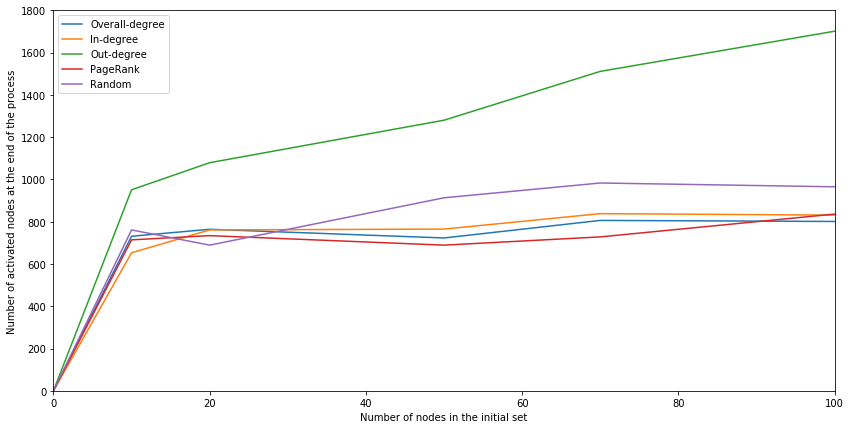

In [360]:
plt.figure(figsize=(14,7))
plt.plot([0,10,20,50,70,100], res_plot_overall, label='Overall-degree')
plt.plot([0,10,20,50,70,100], res_plot_indegree, label='In-degree')
plt.plot([0,10,20,50,70,100], res_plot_outdegree, label='Out-degree')
plt.plot([0,10,20,50,70,100], res_plot_pagerank, label='PageRank')
plt.plot([0,10,20,50,70,100], res_plot_random, label='Random')
plt.legend(loc='upper left')
plt.xlim(0, 100)
plt.ylim(0, 1800)
plt.xlabel('Number of nodes in the initial set')
plt.ylabel('Number of activated nodes at the end of the process')
plt.show()

## Additional tests on out-degree

In [370]:
G_pd_outdegree_2 = G_pd.sort_values(by=['outdegree'], ascending = False)
G_pd_outdegree_2 = G_pd_outdegree_2.drop_duplicates('source').head(20000)

In [371]:
samples_2 = [1000,5000,10000,20000]

In [372]:
res = []
for k in range(len(samples_2)):
    # Model selection
    model = ids.IndependentCascadesModel(G)
    # Model Configuration
    config = mc.Configuration()
    # Model Configuration
    config.add_model_initial_configuration("Infected", list(G_pd_outdegree_2['source'])[:samples_2[k]])
    # Setting the edge parameters
    threshold = 0.5
    for e in G.edges():
        config.add_edge_configuration("threshold", e, threshold)
    model.set_initial_status(config)
    # Simulation execution
    iterations = model.iteration_bunch(200)
    res.append((samples_2[k],iterations[199]))

In [373]:
res

[(1000,
  {'iteration': 199,
   'status': {},
   'node_count': {0: 252000, 1: 0, 2: 4491},
   'status_delta': {0: 0, 1: 0, 2: 0}}),
 (5000,
  {'iteration': 199,
   'status': {},
   'node_count': {0: 245424, 1: 0, 2: 11067},
   'status_delta': {0: 0, 1: 0, 2: 0}}),
 (10000,
  {'iteration': 199,
   'status': {},
   'node_count': {0: 238774, 1: 0, 2: 17717},
   'status_delta': {0: 0, 1: 0, 2: 0}}),
 (20000,
  {'iteration': 199,
   'status': {},
   'node_count': {0: 226967, 1: 0, 2: 29524},
   'status_delta': {0: 0, 1: 0, 2: 0}})]

In [375]:
res_outdegree_overall = [0,1701,4491,11067,17717,29524]

In [376]:
res_outdegree_net = [0,1601,3491,6067,7717,9524]

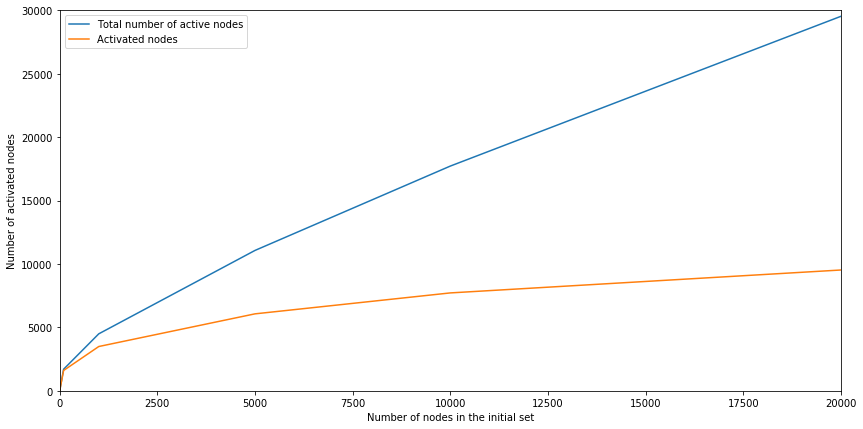

In [378]:
plt.figure(figsize=(14,7))
plt.plot([0,100,1000,5000,10000,20000], res_outdegree_overall, label='Total number of active nodes')
plt.plot([0,100,1000,5000,10000,20000], res_outdegree_net, label='Activated nodes')
plt.legend(loc='upper left')
plt.xlim(0, 20000)
plt.ylim(0, 30000)
plt.xlabel('Number of nodes in the initial set')
plt.ylabel('Number of activated nodes')
plt.show()